In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('data/train.csv')

In [3]:
train_df.shape

(10000038, 4)

In [4]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
print("Number of userId's:", train_df['userId'].nunique())
print("Number of movieId's:", train_df['movieId'].nunique())

Number of userId's: 162541
Number of movieId's: 48213


In [6]:
train_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

There's no missing data in our dataset.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


The data is in the form of numeric values only.

## Ratings Distribution

In [8]:
ratings = train_df['rating'].value_counts().sort_index()

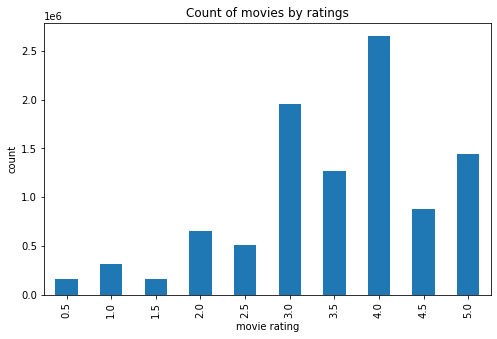

In [9]:
plt.figure(figsize=(8,5))
ratings.plot(kind='bar')
plt.ylabel('count')
plt.xlabel('movie rating')
plt.title('Count of movies by ratings');

There are more movies with ratings of 4.0, followed by 3.0, then 5.0. The issue here is that a movie may have been watched by one user and they might have given it a rating of 5.0. To curb this issue, there might be a need to consider only a movie whereby there we only 100 or more users who have watched the movie.

In [10]:
no_of_ratings = train_df.groupby('movieId').count()['rating']

In [11]:
no_of_ratings = no_of_ratings[no_of_ratings >= 100]

In [23]:
no_of_ratings.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            200822, 200838, 201586, 201588, 201646, 201773, 202103, 202429,
            202439, 204698],
           dtype='int64', name='movieId', length=7306)

In [24]:
new_ratings = train_df[train_df['movieId'].isin(no_of_ratings.index)]

In [25]:
len(new_ratings)

9584362

In [26]:
ratings = new_ratings['rating'].value_counts().sort_index()

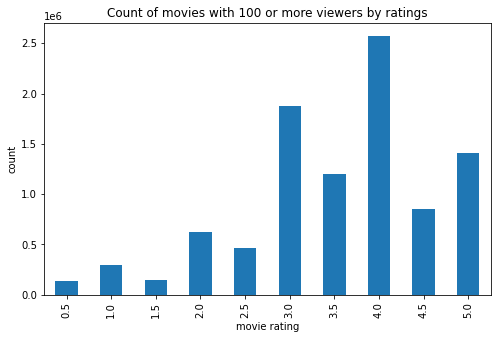

In [27]:
plt.figure(figsize=(8,5))
ratings.plot(kind='bar')
plt.ylabel('count')
plt.xlabel('movie rating')
plt.title('Count of movies with 100 or more viewers by ratings');

In [28]:
# Average rating of movies in the database
avg_rating = new_ratings.groupby('movieId')['rating'].mean()

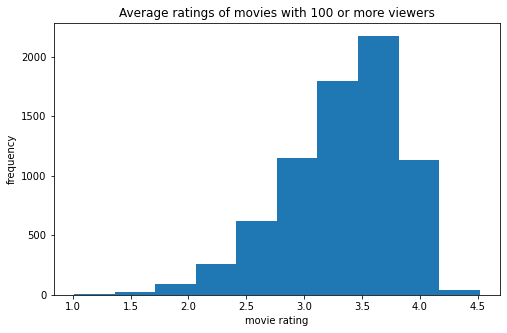

In [29]:
plt.figure(figsize=(8,5))
avg_rating.plot(kind='hist')
plt.ylabel('frequency')
plt.xlabel('movie rating')
plt.title('Average ratings of movies with 100 or more viewers');

There's a high distribution of movies in the region of 3.0 to 4.0.

In [31]:
movies = pd.read_csv('data/movies.csv')

In [75]:
movies.tail()

,movieId,title,genres,year
62418,209157,We (2018),Drama,[2018]
62419,209159,Window of the Soul (2001),Documentary,[2001]
62420,209163,Bad Poems (2018),Comedy|Drama,[2018]
62421,209169,A Girl Thing (2001),(no genres listed),[2001]
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,[1962]


In [57]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
 3   year     62423 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB
